In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
from pandasql import sqldf
import seaborn as sns

Import and tidying data

In [101]:
# load and convert json data to pandas dataframe
url = 'https://raw.githubusercontent.com/nyphilarchive/PerformanceHistory/main/Programs/json/complete.json'
resp = requests.get(url)
dat = json.loads(resp.text)
nycphil = pd.json_normalize(dat['programs'])
nycphil.head(3)

,id,programID,orchestra,season,concerts,works
0,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,3853,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52446*', 'composerName': 'Beethoven, ..."
1,1118e84e-eb59-46cc-9119-d903375e65e6-0.1,5178,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52437*', 'composerName': 'Beethoven, ..."
2,08536612-27c3-437e-9b44-def21034b06c-0.1,10785,Musicians from the New York Philharmonic,1842-43,"[{'eventType': 'Special', 'Location': 'Manhatt...","[{'ID': '52364*1', 'composerName': 'Beethoven,..."


In [102]:
# flatten nested concerts and works data
concerts_dat = pd.json_normalize(dat['programs'], record_path='concerts', 
                              meta=['id', 'orchestra', 'programID', 'season'])
works_dat = pd.json_normalize(data=dat['programs'], record_path='works', 
                               meta=['id', 'orchestra','programID', 'season'])

In [103]:
# Join nested data
nycphil_full = concerts_dat.merge(works_dat, how = "inner", on = ['id', 'orchestra', 'programID','season'])

,eventType,Location,Venue,Date,Time,id,orchestra,programID,season,ID,composerName,workTitle,conductorName,soloists,movement,interval,movement._,movement.em,workTitle._,workTitle.em
0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",[],NaN,NaN,NaN,NaN,NaN,NaN
1,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.","[{'soloistName': 'Otto, Antoinette', 'soloistI...","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN
2,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,"[{'soloistName': 'Scharfenberg, William', 'sol...",NaN,NaN,NaN,NaN,NaN,NaN
3,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,0*,NaN,NaN,NaN,[],NaN,Intermission,NaN,NaN,NaN,NaN
4,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",[],Overture,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis

In [104]:
nycphil_full.shape

(125224, 20)

In [105]:
nycphil_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125224 entries, 0 to 125223
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   eventType      125224 non-null  object
 1   Location       125224 non-null  object
 2   Venue          125224 non-null  object
 3   Date           125224 non-null  object
 4   Time           125224 non-null  object
 5   id             125224 non-null  object
 6   orchestra      125224 non-null  object
 7   programID      125224 non-null  object
 8   season         125224 non-null  object
 9   ID             125224 non-null  object
 10  composerName   106735 non-null  object
 11  workTitle      106723 non-null  object
 12  conductorName  99351 non-null   object
 13  soloists       125224 non-null  object
 14  movement       35160 non-null   object
 15  interval       18489 non-null   object
 16  movement._     148 non-null     object
 17  movement.em    334 non-null     object
 18  work

In [106]:
nycphil_full.head()

,eventType,Location,Venue,Date,Time,id,orchestra,programID,season,ID,composerName,workTitle,conductorName,soloists,movement,interval,movement._,movement.em,workTitle._,workTitle.em
0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",[],NaN,NaN,NaN,NaN,NaN,NaN
1,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.","[{'soloistName': 'Otto, Antoinette', 'soloistI...","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN
2,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,"[{'soloistName': 'Scharfenberg, William', 'sol...",NaN,NaN,NaN,NaN,NaN,NaN
3,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,0*,NaN,NaN,NaN,[],NaN,Intermission,NaN,NaN,NaN,NaN
4,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",[],Overture,NaN,NaN,NaN,NaN,NaN


In [107]:
nycphil_full.isnull().sum()

eventType             0
Location              0
Venue                 0
Date                  0
Time                  0
id                    0
orchestra             0
programID             0
season                0
ID                    0
composerName      18489
workTitle         18501
conductorName     25873
soloists              0
movement          90064
interval         106735
movement._       125076
movement.em      124890
workTitle._      125212
workTitle.em     125212
dtype: int64

Looking at datatypes and missing values, there are a few things to be fixed. 
Date should be converted to a datetime datatype. The documentation indicates that the time value in the Date column is not accurate, so I will take that out of the values. 
There are also missing values starting at the composerName column and on. I will drop columns that are not going to be used in this analysis.

In [111]:
# Convert to date formats
nycphil_full['Date'] = pd.to_datetime(nycphil_full['Date'],infer_datetime_format=True)
nycphil_full['Date'].dt.date # Drop time from Date column
nycphil_full['year'] = nycphil_full['Date'].dt.year

In [114]:
# Convert Time column to a datetime object
nycphil_full['Time'] = nycphil_full['Time'].apply(lambda x: pd.NaT if pd.isna(x) or x == 'None' else x) # Convert 'None' rows to NA
nycphil_full['Time'] = pd.to_datetime(nycphil_full['Time'], format='%I:%M%p').dt.time

In [116]:
# Drop irrelevant columns
nycphil_full = nycphil_full.drop(['soloists', 'interval', 'movement._', 'movement.em', 'workTitle._', 'workTitle.em', 'ID'], axis = 1)

Exploratory Data Analysis

Events

<AxesSubplot:title={'center':'Programs by year'}, xlabel='year'>

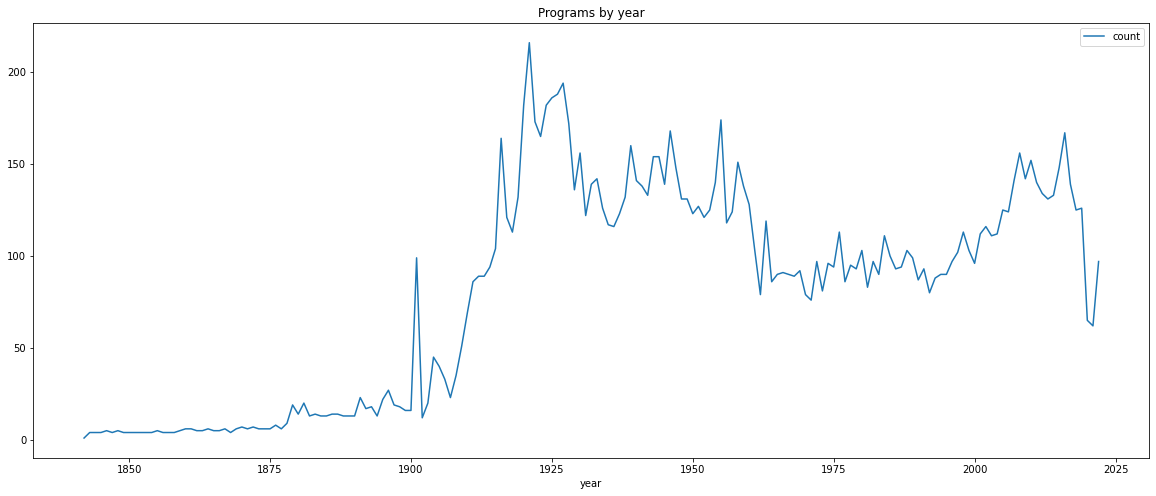

In [119]:
nprograms = sqldf("SELECT COUNT(DISTINCT programid) count, year FROM nycphil_full GROUP BY year")
nprograms = nprograms.drop([181]) #drop 2023 
nprograms.plot(x = 'year',  figsize=[20,8], title = 'Number of events by year')

The number of events put on by the NY Philharmonic peaked around 1920 and declined in the 1930s and 1960s before picking back up a bit beginning in the early 2000s. Interesting to see here how the number of events suffered due to the pandemic and have not seemed to rebound quite as much since 2020.

<AxesSubplot:title={'center':'Top 15 event types'}, ylabel='eventType'>

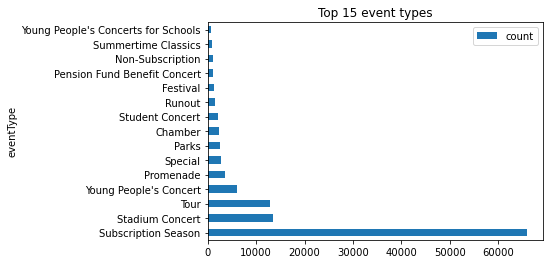

In [19]:
allevents = sqldf("SELECT COUNT(*) count, eventType FROM nycphil_full GROUP BY eventType ORDER BY count DESC LIMIT 15")
allevents.plot(kind='barh', x = 'eventType', y = 'count', title = 'Top 15 event types of all time')

<AxesSubplot:title={'center':'Top 15 event types pre-1940'}, ylabel='eventType'>

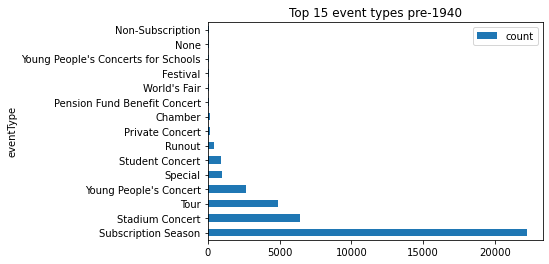

In [239]:
eventsfirst100 = sqldf("SELECT COUNT(*) count, eventType FROM nycphil_full WHERE year < 1940 GROUP BY eventType ORDER BY count DESC LIMIT 15")
eventsfirst100.plot(kind='barh', x = 'eventType', y = 'count', title = 'Top 15 event types pre-1940')

<AxesSubplot:title={'center':'Top 15 event types since 2013'}, ylabel='eventType'>

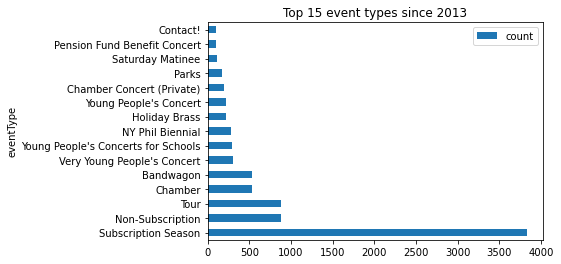

In [20]:
events10 = sqldf("SELECT COUNT(*) count, eventType FROM nycphil_full WHERE year > 2012 GROUP BY eventType ORDER BY count DESC LIMIT 15")
events10.plot(kind='barh', x = 'eventType', y = 'count', title = 'Top 15 event types since 2013')

Subscription season events dominate the top type of event overall. Aside from this, it seems that the NY Phil has moved toward more chamber and non-subscription concerts in the last 10 years compared to across time and pre-1940. There is also a lot more variety in types of concerts the NY Phil has put on in recent years. 

Composers

<AxesSubplot:title={'center':'Top 15 composers played of all time'}, ylabel='composer'>

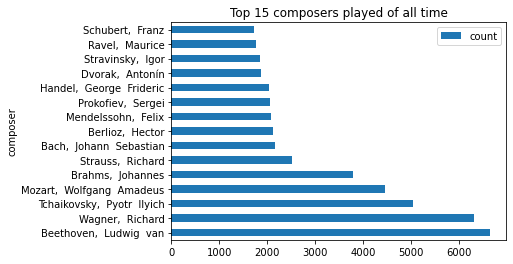

In [21]:
composers = sqldf("SELECT COUNT(*) count, composerName AS composer FROM nycphil_full GROUP BY composerName ORDER BY count DESC LIMIT 16")
composers = composers.drop([0])
composers.plot(kind='barh', x = 'composer', y = 'count', title = 'Top 15 composers played of all time')

<AxesSubplot:title={'center':'Top 15 composers played before 1940'}, ylabel='composer'>

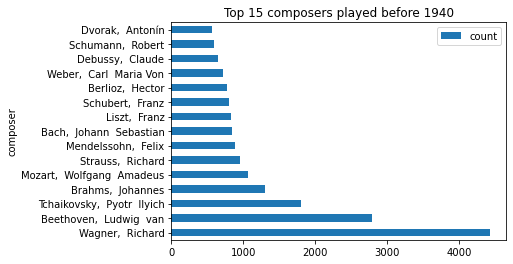

In [240]:
composers_pre1940 = sqldf("SELECT COUNT(*) count, composerName composer FROM nycphil_full WHERE year < 1940 GROUP BY composerName ORDER BY count DESC LIMIT 16")
composers_pre1940 = composers_pre1940.drop([0])
composers_pre1940.plot(kind='barh', x = 'composer', y = 'count', title = 'Top 15 composers played before 1940')

<AxesSubplot:title={'center':'Top 15 composers played in the last 10 years'}, ylabel='composer'>

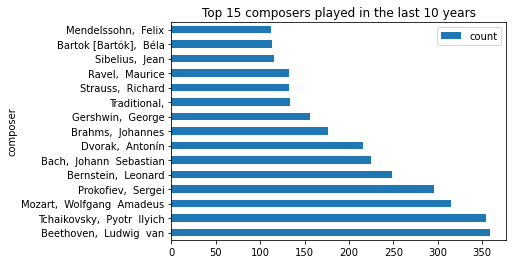

In [22]:
composers_last10 = sqldf("SELECT COUNT(*) count, composerName composer FROM nycphil_full WHERE year > 2012 GROUP BY composerName ORDER BY count DESC LIMIT 16")
composers_last10 = composers_last10.drop([0])
composers_last10.plot(kind='barh', x = 'composer', y = 'count', title = 'Top 15 composers played in the last 10 years')

Classical male composers dominate the top 15 played by the NYC Philharmonic in terms of all time programs and programs from the last 10 years. Most seem to be composers from the Romantic Era, but in the last 10 years we see a few composers from the 20th century included such as George Gershwin, Bela Bartok, Leonard Bernstein, and "Traditional". It makes sense that these composers do not appear in the top 15 of all time since they were only beginning to write their music after the NYC Philharmonic had been performing for a number of decades already.
It would be interesting to look further into how the frequency of these composer's repertoire being performed has progressed over the years such as Beethoven, who is first in both lists, and Wagner, who was the second most played of all time but drops off the list entirely in the last 10 years. 

<AxesSubplot:title={'center':'Beethoven by year'}, xlabel='year'>

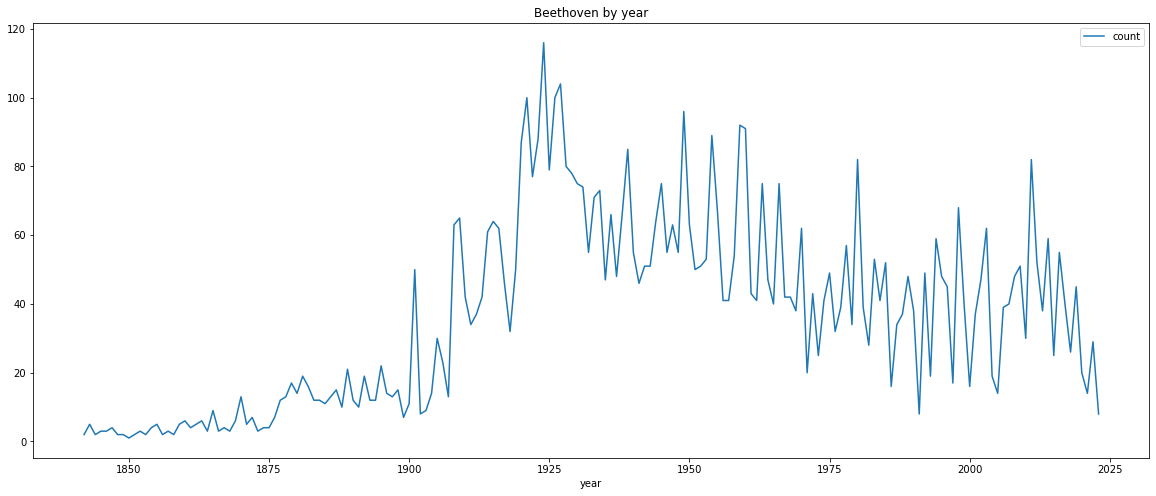

In [23]:
beethoven = sqldf("SELECT COUNT(*) AS count, year, composerName AS composer FROM nycphil_full WHERE composer LIKE 'Beethoven%' GROUP BY composerName, year")
beethoven.plot(x = 'year',  figsize=[20,8], title = 'Beethoven by year')

<AxesSubplot:title={'center':'Wagner by year'}, xlabel='year'>

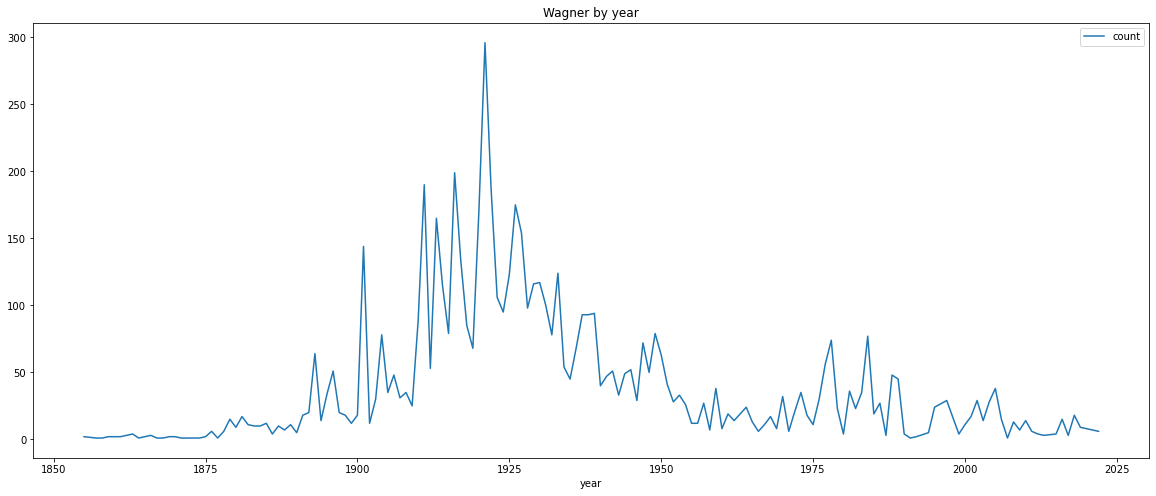

In [120]:
wagner = sqldf("SELECT COUNT(*) AS count, year, composerName AS composer FROM nycphil_full WHERE composer LIKE 'Wagner,  Richard%' GROUP BY composerName, year")
wagner.plot(x = 'year',  figsize=[20,8], title = 'Wagner by year')

The number of Beethoven compositions performed over the years seems to be consistent, given that the peak number of events per year was also around 1925. Wagner, however, had his compositions experience a heavy decline after their peak around 1920 and have been hardly played in the last 20 years or so. Wagner's decline in popularity could likely be because of his associations with Hitler, which led many people and groups to boycott his music starting in the 1940s.

This plot is not the best way to look at the data. It looks like Beethoven and Wagner were most played around 1925, but we also saw earlier that 1925 was when the NY Philarmonic had their highest number of performances, and were therefore playing more music in general. A better way to view this data would be by looking at what proportion of the compositions performed in each year were written by a given composer.

In [232]:
# Create a dataframe that shows the proportion of works represented in that year's programs for each composer
tot = sqldf("SELECT year, COUNT(*) AS total FROM nycphil_full GROUP BY year")
composers_cnt = sqldf("SELECT COUNT(*) count, year, composerName composer FROM nycphil_full WHERE composerName NOT IN ('None', 'Traditional,', 'Anthem,') GROUP BY year, composerName")
compcnt = sqldf("SELECT composers_cnt.year, composer, count, tot.total FROM composers_cnt LEFT JOIN tot ON composers_cnt.year = tot.year")
compcnt['prop'] = compcnt['count']/compcnt['total']
compcnt

,year,composer,count,total,prop
0,1842,"Beethoven, Ludwig van",2,9,0.222222
1,1842,"Hummel, Johann",1,9,0.111111
2,1842,"Kalliwoda, Johann W.",1,9,0.111111
3,1842,"Mozart, Wolfgang Amadeus",1,9,0.111111
4,1842,"Rossini, Gioachino",1,9,0.111111
...,...,...,...,...,...
16568,2023,"Third Graders from PS 11, Brooklyn,",7,142,0.049296
16569,2023,"Thorvaldsdottir, Anna",5,142,0.035211
16570,2023,"Wang, Lu",3,142,0.021127
16571,2023,"Wyner, Yehudi",1,142,0.007042


In [238]:
# Proportion listed in descending order
sqldf("SELECT year, composer, prop FROM compcnt ORDER BY prop DESC LIMIT 15")

,year,composer,prop
0,1850,"Mendelssohn, Felix",0.413793
1,1848,"Mendelssohn, Felix",0.305556
2,1893,"Wagner, Richard",0.292237
3,1877,"Beethoven, Ludwig van",0.285714
4,1870,"Beethoven, Ludwig van",0.270833
5,1911,"Wagner, Richard",0.255376
6,1904,"Wagner, Richard",0.254902
7,1991,"Mozart, Wolfgang Amadeus",0.242604
8,1851,"Mendelssohn, Felix",0.241379
9,1842,"Beethoven, Ludwig van",0.222222


Before plotting the composers on a graph, I thought it would be interesting to see which composers had the highest proportion of works performed by year of all time. It's surprising to see Mendelssohn, who does not appear in the top 15 composers of all time, far outpacing the rest in the number one spot and appearing on this list four times. His compositions made up 41% (or nearly half) of works played by the NY Philharmonic in 1850. He is also ranked second on this list by making up 31% of works performed in 1848. Mendelssohn died in November of 1847, so I would probably attribute his death with so much of his work being performed in the following years.

<AxesSubplot:title={'center':'Beethoven by year'}, xlabel='year'>

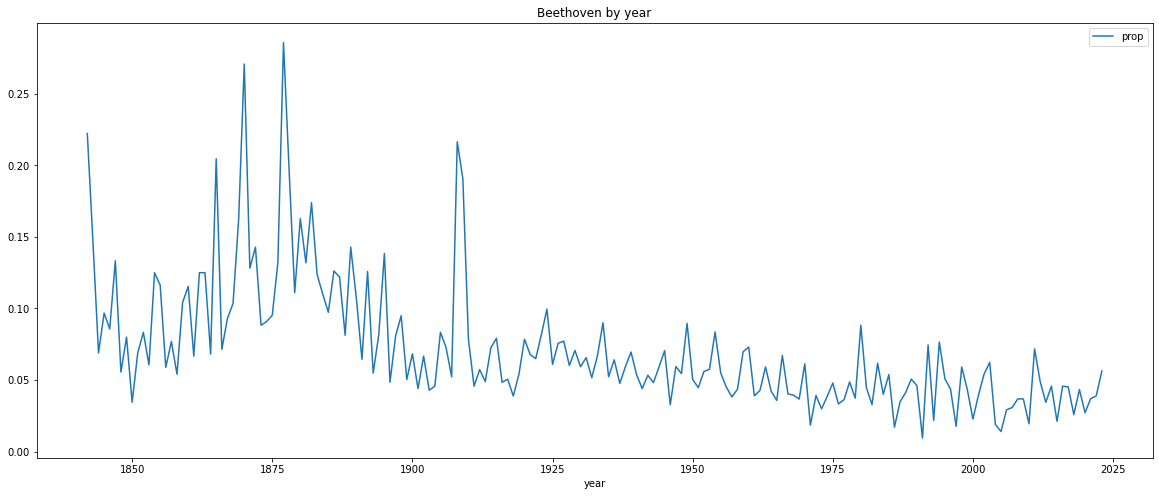

In [151]:
# What percentage of Beethoven's works made up the program for that year?
temp = sqldf("SELECT year, SUM(CASE WHEN composerName LIKE '%Beethoven%' THEN 1 ELSE 0 END) AS Beethoven, COUNT(*) AS total FROM nycphil_full GROUP BY year")
temp['prop']=temp['Beethoven']/temp['total']
temp.plot(x = 'year', y = 'prop', figsize=[20,8], title = 'Beethoven by year')

<AxesSubplot:title={'center':'Wagner by year'}, xlabel='year'>

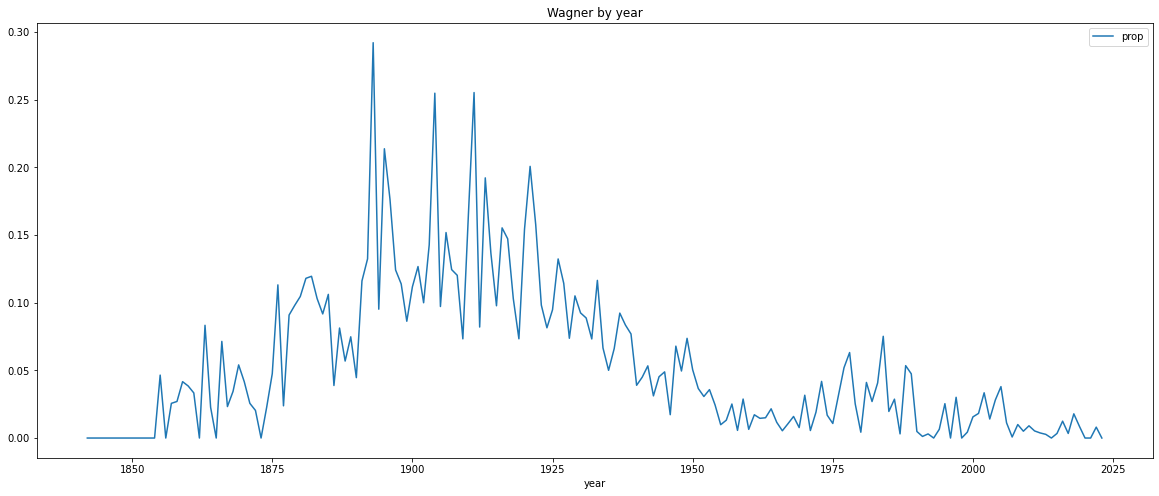

In [152]:
# What percentage of Wagner's works made up the program for that year?
temp = sqldf("SELECT year, SUM(CASE WHEN composerName LIKE 'Wagner,  Richard%' THEN 1 ELSE 0 END) AS Wagner, COUNT(*) AS total FROM nycphil_full GROUP BY year")
temp['prop']=temp['Wagner']/temp['total']
temp.plot(x = 'year', y = 'prop', figsize=[20,8], title = 'Wagner by year')

<AxesSubplot:title={'center':'Gershwin by year'}, xlabel='year'>

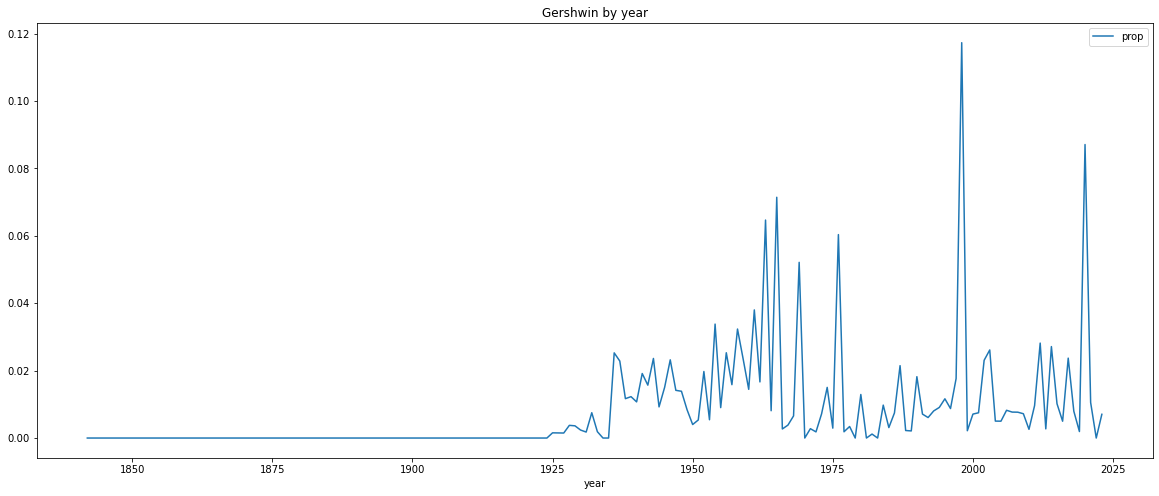

In [153]:
# What percentage of Gershwin's works made up the program for that year?
temp = sqldf("SELECT year, SUM(CASE WHEN composerName LIKE 'Gershwin%' THEN 1 ELSE 0 END) AS Gershwin, COUNT(*) AS total FROM nycphil_full GROUP BY year")
temp['prop']=temp['Gershwin']/temp['total']
temp.plot(x = 'year', y = 'prop', figsize=[20,8], title = 'Gershwin by year')

<AxesSubplot:title={'center':'Mozart by year'}, xlabel='year'>

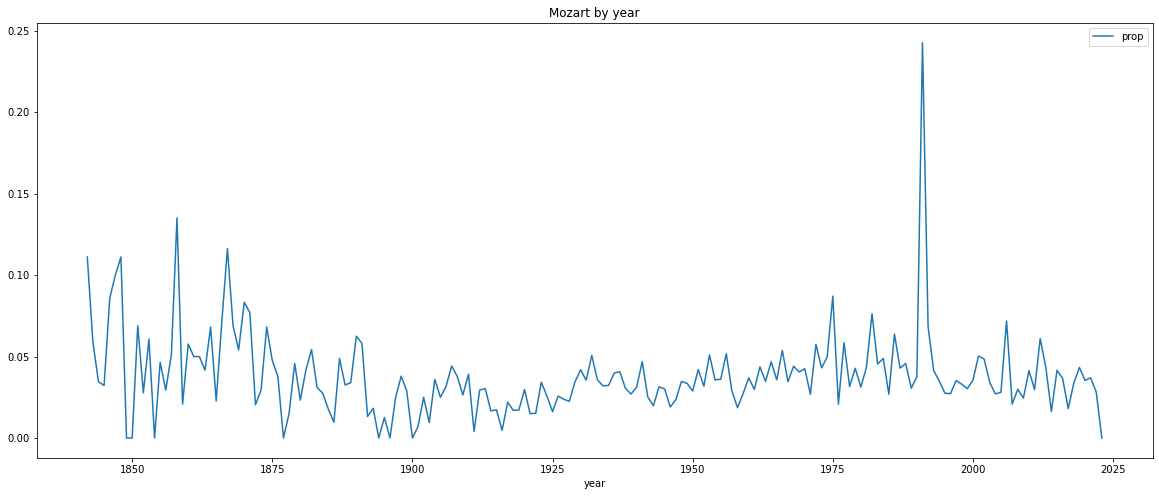

In [154]:
# What percentage of Mozart's works made up the program for that year?
temp = sqldf("SELECT year, SUM(CASE WHEN composerName LIKE 'Mozart%' THEN 1 ELSE 0 END) AS Mozart, COUNT(*) AS total FROM nycphil_full GROUP BY year")
temp['prop']=temp['Mozart']/temp['total']
temp.plot(x = 'year', y = 'prop', figsize=[20,8], title = 'Mozart by year')

<AxesSubplot:xlabel='year'>

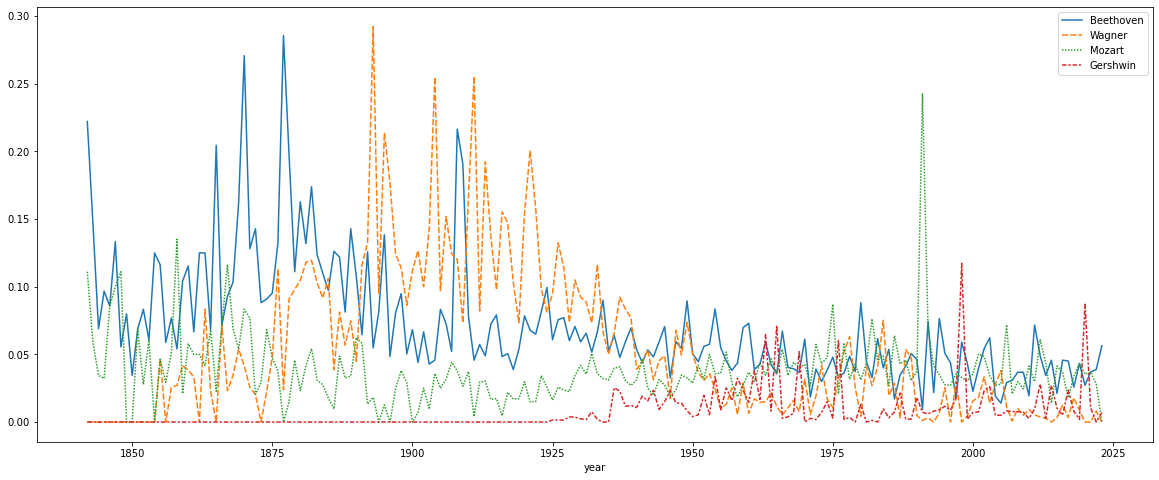

In [241]:
composers = ['Beethoven', 'Wagner,  R', 'Mozart,  W', 'Gershwin']
filt = compcnt['composer'].str.startswith(tuple(composers))
filtered_df = compcnt[filt]
filtered_df = filtered_df.pivot_table(index = 'year', columns = 'composer', values = 'prop').fillna(0)
new_columns = [col.split()[0].replace(',','') for col in filtered_df.columns]
filtered_df.columns = new_columns
#filtered_df.plot(kind = 'line', x = 'year', y = 'prop', figsize=[20,8], title = 'composers by year')
filtered_df
plt.figure(figsize=(20,8))
sns.lineplot(data=filtered_df[['Beethoven','Wagner','Mozart','Gershwin']])

Looking at the proportion of Beethoven, Wagner, Mozart, and Gershwin works performed, we can compare their prominence over time. Beethoven's work made up a large portion of the NY Philharmonic's performances before 1920 and then steadily declined. Wagner's works steeply increased around the turn of the 19th century, right when Beethoven's works started to decline. We can see a steep decline in the performance of Wagner's works around the 1930s. Mozart's works did not quite reach the same levels of performance in a year as Beethoven or Wagner, but we can see a very steady increase over time. 
Generally, it seems like the NY Philharmonic has diversified the number of composers whose work they perform since we do not see any of these composers ever quite reaching the proportion of the program their works make up each year starting in the mid-19th century, with the exception of Mozart in 1991.

The 200th anniversary of Mozart's death was in 1991, so it would make sense why so much of his work made up the NY Philharmonic program for that year. Another trend in this chart that can be explained is the drastic decline of Wanger's work. Wagner was one of Hitler's favorite composers and his work was largely promoted among the third reich. This led many to boycott his works starting in the WWII era which explains his heavy decline in the 1930s/40s depicted in the figure above.

Works
* Add most frequently played works all time and last 10 years

Conductors

<AxesSubplot:title={'center':'Top 15 conductors in 2022'}, ylabel='conductor'>

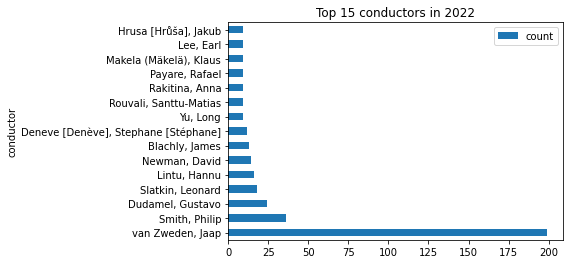

In [25]:
conduct22 = sqldf("SELECT COUNT(*) count, conductorName AS conductor FROM nycphil_full WHERE year = 2022 GROUP BY conductor ORDER BY count DESC LIMIT 16")
conduct22 = conduct22.drop([0])
conduct22.plot(kind='barh', x = 'conductor', y = 'count', title = 'Top 15 conductors in 2022')

Jaap van Zweden is music director of the New York Philharmonic, so it makes sense why he largely outpaces every other name among the top 15 conductors for all programs in 2022. We get a glimpse into how male-dominated this profession is by observing that there are only two women on this list.